In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import gc



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iiitb2020-home-credit-default-risk/sample_submission.csv
/kaggle/input/iiitb2020-home-credit-default-risk/bureau_balance.csv
/kaggle/input/iiitb2020-home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/iiitb2020-home-credit-default-risk/application_train.csv
/kaggle/input/iiitb2020-home-credit-default-risk/application_test.csv
/kaggle/input/iiitb2020-home-credit-default-risk/previous_application.csv
/kaggle/input/iiitb2020-home-credit-default-risk/credit_card_balance.csv
/kaggle/input/iiitb2020-home-credit-default-risk/installments_payments.csv
/kaggle/input/iiitb2020-home-credit-default-risk/bureau.csv


In [2]:
application_train = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/application_train.csv")

In [3]:
bureau = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/bureau.csv")
bureau_balance = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/bureau_balance.csv")

In [4]:
previous_application = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/previous_application.csv")
POS_CASH_balance = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/POS_CASH_balance.csv")


In [5]:
installments_payments = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/installments_payments.csv")
credit_card_balance = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/credit_card_balance.csv")

In [6]:
application_test = pd.read_csv("/kaggle/input/iiitb2020-home-credit-default-risk/application_test.csv")

In [7]:
# application_test.merge(bureau.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count(),on='SK_ID_CURR',how='inner').shape

# Observing the nature of columns

In [8]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,aou6ud,0,Cash loans,M,N,Y,0,360000.0,1125000.0,33025.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,xxbaad,0,Cash loans,F,N,Y,0,112500.0,251280.0,13630.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
2,xdrbad,0,Cash loans,F,N,Y,0,225000.0,544491.0,15916.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
3,rbdd7d,0,Cash loans,F,N,N,2,211500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,rexddr,1,Cash loans,F,N,Y,0,90000.0,113760.0,8406.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [9]:
application_train.dtypes.value_counts()

float64    65
int64      40
object     17
dtype: int64

In [10]:
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                    199882
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
OCCUPATION_TYPE                   18
WEEKDAY_APPR_PROCESS_START         7
ORGANIZATION_TYPE                 58
FONDKAPREMONT_MODE                 4
HOUSETYPE_MODE                     3
WALLSMATERIAL_MODE                 7
EMERGENCYSTATE_MODE                2
dtype: int64

In [11]:
bureau.dtypes.value_counts()
bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR          305811
SK_ID_BUREAU       1716428
CREDIT_ACTIVE            4
CREDIT_CURRENCY          4
CREDIT_TYPE             15
dtype: int64

In [12]:
bureau_balance.dtypes.value_counts()
bureau_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_BUREAU    817395
STATUS               8
dtype: int64

In [13]:
previous_application.dtypes.value_counts()
previous_application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
WEEKDAY_APPR_PROCESS_START           7
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
NAME_SELLER_INDUSTRY                11
NAME_YIELD_GROUP                     5
PRODUCT_COMBINATION                 17
dtype: int64

In [14]:
POS_CASH_balance.dtypes.value_counts()
POS_CASH_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV              936325
SK_ID_CURR              337252
NAME_CONTRACT_STATUS         9
dtype: int64

In [15]:
installments_payments.dtypes.value_counts()
installments_payments.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV    997752
SK_ID_CURR    339587
dtype: int64

In [16]:
credit_card_balance.dtypes.value_counts()
credit_card_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV              104307
SK_ID_CURR              103558
NAME_CONTRACT_STATUS         7
dtype: int64

# Analyzing relation between columns

In [17]:
corr_matrix = application_train.corr().abs()
corr_matrix.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.017377,0.022647,0.030650,0.013574,0.040526,0.039665,0.078178,0.044165,0.041539,...,0.006287,0.000439,0.002000,0.002044,0.000914,0.003523,0.001205,0.013582,0.003726,0.020354
CNT_CHILDREN,0.017377,1.000000,0.024950,0.002666,0.022664,0.001091,0.023048,0.329245,0.238710,0.184554,...,0.003919,0.002808,0.000499,0.003523,0.001879,0.000549,0.000631,0.012255,0.007613,0.041640
AMT_INCOME_TOTAL,0.022647,0.024950,1.000000,0.351630,0.431299,0.358549,0.170481,0.057440,0.141827,0.062642,...,0.005553,0.006071,0.000836,0.000457,0.001705,0.008415,0.005345,0.060728,0.013352,0.029574
AMT_CREDIT,0.030650,0.002666,0.351630,1.000000,0.768272,0.986932,0.098587,0.055796,0.067059,0.010087,...,0.036498,0.021216,0.032078,0.014843,0.004578,0.004442,0.002563,0.053776,0.015149,0.047274
AMT_ANNUITY,0.013574,0.022664,0.431299,0.768272,1.000000,0.773641,0.118100,0.008715,0.103792,0.040012,...,0.009479,0.004401,0.012636,0.015093,0.004470,0.003343,0.012929,0.039914,0.008774,0.008871


In [18]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,NaN,0.017377,0.022647,0.030650,0.013574,0.040526,0.039665,0.078178,0.044165,0.041539,...,0.006287,0.000439,0.002000,0.002044,0.000914,0.003523,0.001205,0.013582,0.003726,0.020354
CNT_CHILDREN,NaN,NaN,0.024950,0.002666,0.022664,0.001091,0.023048,0.329245,0.238710,0.184554,...,0.003919,0.002808,0.000499,0.003523,0.001879,0.000549,0.000631,0.012255,0.007613,0.041640
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.351630,0.431299,0.358549,0.170481,0.057440,0.141827,0.062642,...,0.005553,0.006071,0.000836,0.000457,0.001705,0.008415,0.005345,0.060728,0.013352,0.029574
AMT_CREDIT,NaN,NaN,NaN,NaN,0.768272,0.986932,0.098587,0.055796,0.067059,0.010087,...,0.036498,0.021216,0.032078,0.014843,0.004578,0.004442,0.002563,0.053776,0.015149,0.047274
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,0.773641,0.118100,0.008715,0.103792,0.040012,...,0.009479,0.004401,0.012636,0.015093,0.004470,0.003343,0.012929,0.039914,0.008774,0.008871


In [19]:
collinear_cols = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Collinear columns: ",(len(collinear_cols)))

Collinear columns:  32


In [20]:
df_new = corr_matrix[corr_matrix['TARGET']<0.01]
print("Columns with correlation value <0.01 relative to TARGET: ", df_new.shape[0])

Columns with correlation value <0.01 relative to TARGET:  31


## Analyzing Null values in the datasets

In [21]:
def nullInfo(df,count = 10):
    total = df.isna().sum().sort_values(ascending = False)
    percent = (df.isna().sum()/df.isna().count()*100).sort_values(ascending = False)
    missing_df_data  = pd.concat([total, percent], axis=1, keys=['Total_Missing_Values', 'Missing_Values_Percent'])
    print(missing_df_data.head(count))

In [22]:
print('Null value information for Application_train data : ')
nullInfo(application_train,20)

Null value information for Application_train data : 
                          Total_Missing_Values  Missing_Values_Percent
COMMONAREA_MEDI                         139817               69.949770
COMMONAREA_AVG                          139817               69.949770
COMMONAREA_MODE                         139817               69.949770
NONLIVINGAPARTMENTS_MODE                138850               69.465985
NONLIVINGAPARTMENTS_MEDI                138850               69.465985
NONLIVINGAPARTMENTS_AVG                 138850               69.465985
FONDKAPREMONT_MODE                      136876               68.478402
LIVINGAPARTMENTS_MEDI                   136707               68.393852
LIVINGAPARTMENTS_MODE                   136707               68.393852
LIVINGAPARTMENTS_AVG                    136707               68.393852
FLOORSMIN_MEDI                          135783               67.931580
FLOORSMIN_MODE                          135783               67.931580
FLOORSMIN_AVG           

Many columns are having a large number of null values`(> 60%)` in application_train data.

In [23]:
print('Null value information for Bureau data : ')
nullInfo(bureau)

Null value information for Bureau data : 
                        Total_Missing_Values  Missing_Values_Percent
AMT_ANNUITY                          1226791               71.473490
AMT_CREDIT_MAX_OVERDUE               1124488               65.513264
DAYS_ENDDATE_FACT                     633653               36.916958
AMT_CREDIT_SUM_LIMIT                  591780               34.477415
AMT_CREDIT_SUM_DEBT                   257669               15.011932
DAYS_CREDIT_ENDDATE                   105553                6.149573
AMT_CREDIT_SUM                            13                0.000757
CREDIT_TYPE                                0                0.000000
AMT_CREDIT_SUM_OVERDUE                     0                0.000000
CNT_CREDIT_PROLONG                         0                0.000000


In [24]:
print('Null value information for Bureau Balance data : ')
nullInfo(bureau_balance)

Null value information for Bureau Balance data : 
                Total_Missing_Values  Missing_Values_Percent
STATUS                             0                     0.0
MONTHS_BALANCE                     0                     0.0
SK_ID_BUREAU                       0                     0.0


In [25]:
print('Null value information for Previous Application data : ')
nullInfo(previous_application)

Null value information for Previous Application data : 
                           Total_Missing_Values  Missing_Values_Percent
RATE_INTEREST_PRIVILEGED                1664263               99.643698
RATE_INTEREST_PRIMARY                   1664263               99.643698
RATE_DOWN_PAYMENT                        895844               53.636480
AMT_DOWN_PAYMENT                         895844               53.636480
NAME_TYPE_SUITE                          820405               49.119754
DAYS_TERMINATION                         673065               40.298129
NFLAG_INSURED_ON_APPROVAL                673065               40.298129
DAYS_FIRST_DRAWING                       673065               40.298129
DAYS_FIRST_DUE                           673065               40.298129
DAYS_LAST_DUE_1ST_VERSION                673065               40.298129


In "Previous Application" data, we can see high percentage of null values for `RATE_INTEREST` fields, and we can afford to drop them.

In [26]:
previous_application.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'], axis=1, inplace=True)

In [27]:
print('Null value information for POS_CASH_BALANCE data : ')
nullInfo(POS_CASH_balance,3)

Null value information for POS_CASH_BALANCE data : 
                       Total_Missing_Values  Missing_Values_Percent
CNT_INSTALMENT_FUTURE                 26087                0.260835
CNT_INSTALMENT                        26071                0.260675
SK_DPD_DEF                                0                0.000000


In [28]:
print('Null value information for Installments Payments data : ')
nullInfo(installments_payments,3)

Null value information for Installments Payments data : 
                    Total_Missing_Values  Missing_Values_Percent
AMT_PAYMENT                         2905                0.021352
DAYS_ENTRY_PAYMENT                  2905                0.021352
AMT_INSTALMENT                         0                0.000000


In [29]:
print('Null value information for Credit Card Balance data : ')
nullInfo(credit_card_balance)

Null value information for Credit Card Balance data : 
                            Total_Missing_Values  Missing_Values_Percent
AMT_PAYMENT_CURRENT                       767988               19.998063
AMT_DRAWINGS_OTHER_CURRENT                749816               19.524872
CNT_DRAWINGS_POS_CURRENT                  749816               19.524872
CNT_DRAWINGS_OTHER_CURRENT                749816               19.524872
CNT_DRAWINGS_ATM_CURRENT                  749816               19.524872
AMT_DRAWINGS_ATM_CURRENT                  749816               19.524872
AMT_DRAWINGS_POS_CURRENT                  749816               19.524872
CNT_INSTALMENT_MATURE_CUM                 305236                7.948208
AMT_INST_MIN_REGULARITY                   305236                7.948208
SK_DPD_DEF                                     0                0.000000


# EDA

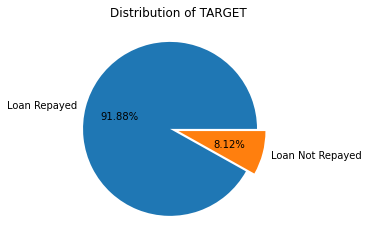

In [30]:
target_counts = application_train['TARGET'].value_counts()
plt.pie([target_counts[0], target_counts[1]], labels=['Loan Repayed', 'Loan Not Repayed'],explode=[0.1,0],autopct='%.2f%%')
plt.title('Distribution of TARGET')
plt.show()

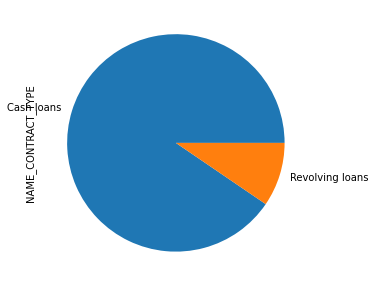

In [31]:
contract_counts = application_train['NAME_CONTRACT_TYPE'].value_counts()
# sns.barplot(data=application_train, x=contract_val.index, y=contract_val.values)
contract_counts.plot.pie(y='NAME_CONTRACT_TYPE', figsize=(5,5))

Distribution of AMT_CREDIT


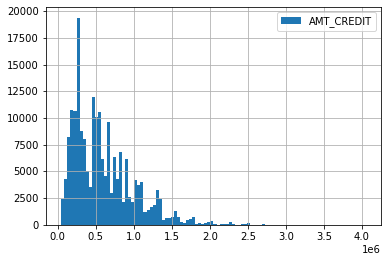

In [32]:
df_amt_credit = application_train['AMT_CREDIT']
print("Distribution of AMT_CREDIT" )
histplot = df_amt_credit.hist(bins = 100, legend="true")

Distribution After applying log


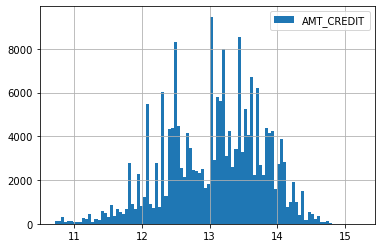

In [33]:
import math
df_amt_credit = application_train['AMT_CREDIT']
# df_amt_credit = df_amt_credit)
print("Distribution After applying log")
histplot = np.log(df_amt_credit).hist(bins = 100 ,legend="true")

Text(0.5, 0.98, 'Age distribution')

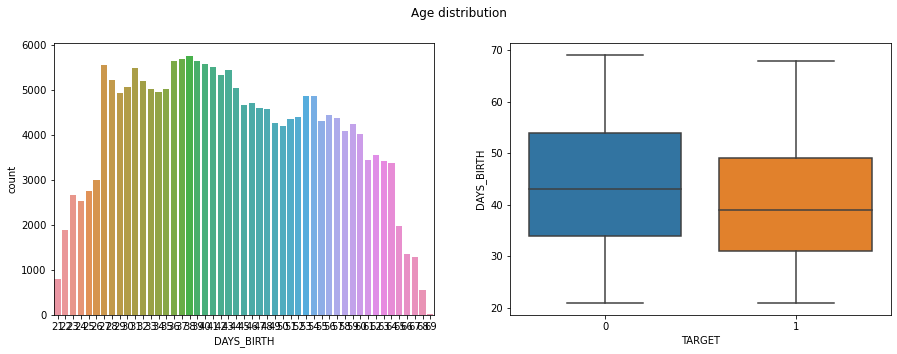

In [34]:
age_years = application_train['DAYS_BIRTH']//(-365)
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=age_years,ax=ax[0])
sns.boxplot(y=age_years, x=application_train['TARGET'],ax=ax[1])
fig.suptitle('Age distribution')

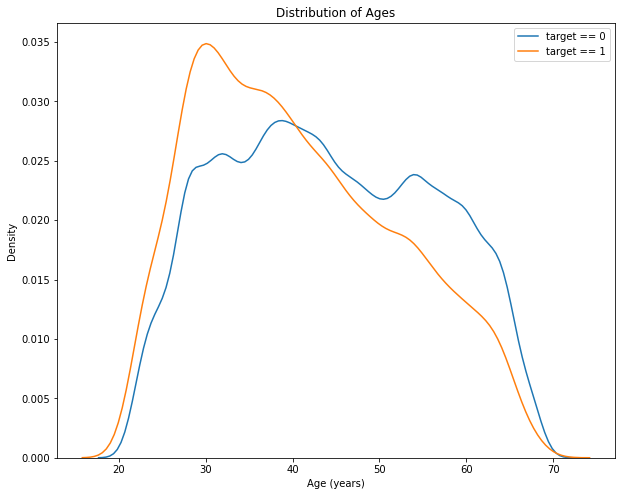

In [35]:
plt.figure(figsize = (10, 8))
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Distribution of days before customer started current employment


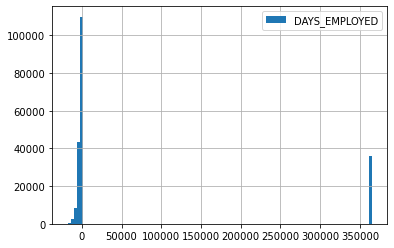

In [36]:
df_days_employed = application_train['DAYS_EMPLOYED']
print("Distribution of days before customer started current employment")
histplot = df_days_employed.hist(bins = 100 ,legend="true")

In [37]:
error = application_train[application_train['DAYS_EMPLOYED'] == 365243]
print('Number of wrong entries: ',len(error))

Number of wrong entries:  35869


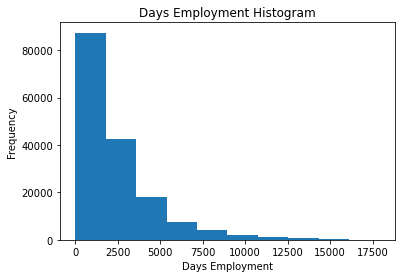

In [38]:
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(application_train['DAYS_EMPLOYED']/(-1)).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

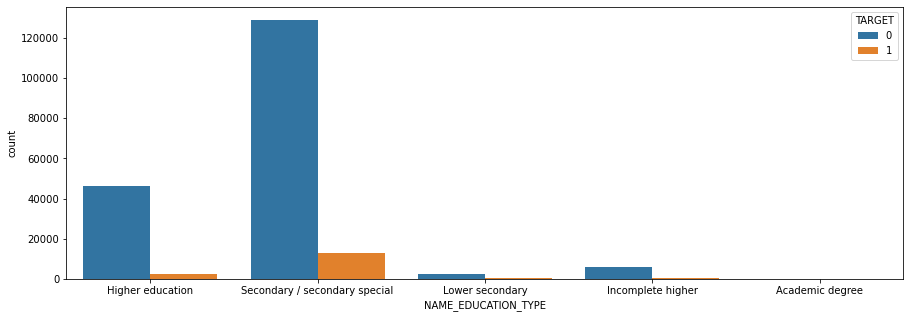

In [39]:
fig, ax = plt.subplots(figsize=(15,5))

chart = sns.countplot(x=application_train['NAME_EDUCATION_TYPE'],hue=application_train['TARGET'])


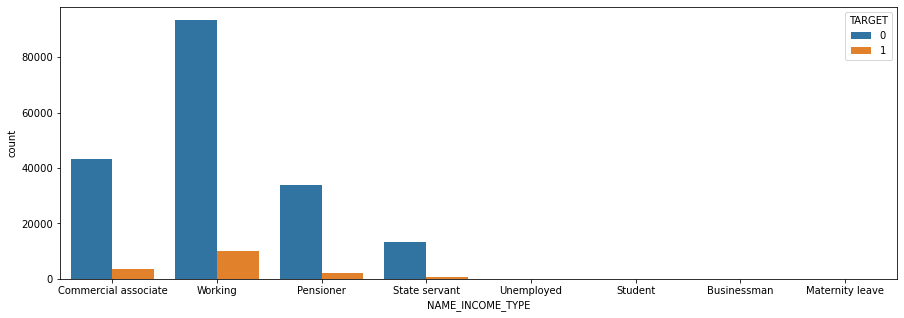

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

chart = sns.countplot(x=application_train['NAME_INCOME_TYPE'],hue=application_train['TARGET'])

# application_train[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']]

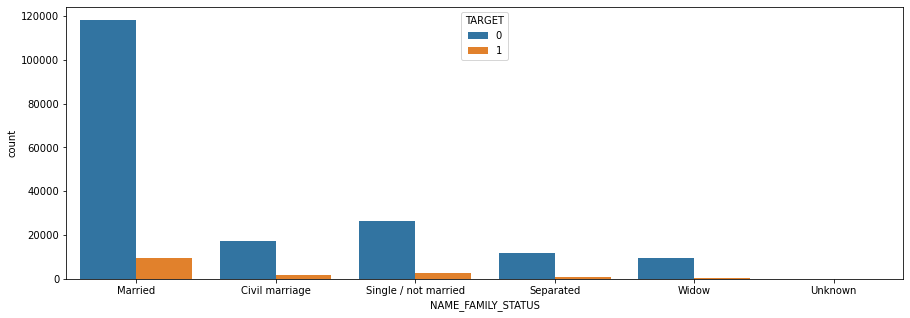

In [41]:
fig, ax = plt.subplots(figsize=(15,5))

chart = sns.countplot(x=application_train['NAME_FAMILY_STATUS'],hue=application_train['TARGET'])

## Concat application_train and application_test to preprocess

In [42]:
#concat train and test data after aligning
TARGET = application_train[['TARGET']]
application_train.drop(['TARGET'], axis=1 , inplace=True)
application_train, application_test = application_train.align(application_test, join='left', axis=1)
data = pd.concat([application_train, application_test], ignore_index=True)
print(application_train.shape)
print(application_test.shape)
print(data.shape)

(199882, 121)
(107629, 121)
(307511, 121)


Imputation, one-hot encoding and label encoding :

In [43]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [44]:
data_pre = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include='number')), columns=data.select_dtypes(include='number').columns)

data_categorical = data.select_dtypes('object')

temp = data_categorical.apply(pd.Series.nunique, axis = 0).reset_index()

#One-Hot Encoding categorical columns with less than 5 distinct values
cols = temp[temp[0]<5]['index'].to_numpy()
data_categorical_ohe = pd.get_dummies(data_categorical[cols], dummy_na=True, drop_first=True)
data_categorical.drop(cols, axis=1, inplace=True)

#Label Encoding remaining columns
le1 = LabelEncoder()
for col in data_categorical.columns:
    if col!='SK_ID_CURR':
        data_categorical[col][data_categorical[col].isna()] = 'NaN'
        data_categorical[col] = le1.fit_transform(data_categorical[col])
data_pre = data_pre.join(data_categorical)
data_pre = data_pre.join(data_categorical_ohe)

del data_categorical_ohe, data_categorical

print(data_pre.shape)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

(307511, 132)


In [45]:
gc.collect()

6539

## Merge other datasets with main data

### Merge bureau dataset

In [46]:
#numerical columns
bureau_pre = bureau.drop(['SK_ID_BUREAU'],axis=1).groupby(by=['SK_ID_CURR']).mean().reset_index()
bureau_pre.columns = ['BUREAU_'+ i if i !='SK_ID_CURR' else i for i in bureau_pre.columns]
bureau_pre.fillna(0, inplace=True)
bureau_pre['BUREAU_COUNT'] = bureau[['SK_ID_CURR','SK_ID_BUREAU']].groupby(by=['SK_ID_CURR']).count().reset_index()['SK_ID_BUREAU']

bureau_pre.head()
data_appl_bureau = data_pre.merge(bureau_pre, on = 'SK_ID_CURR', how='left')
# appl_test_final = application_test.merge(bureau_pre, on = 'SK_ID_CURR', how='left')

#categorical columns
bureau_categorical = bureau.select_dtypes('object')
bureau_categorical.drop('SK_ID_BUREAU', axis=1, inplace=True)
bureau_categorical.columns = ['BUREAU_'+ i if i !='SK_ID_CURR' else i for i in bureau_categorical.columns]

temp = bureau_categorical.apply(pd.Series.nunique, axis = 0).reset_index()
#One-Hot Encoding categorical columns with less than 5 distinct values
cols = temp[temp[0]<5]['index'].to_numpy()
bureau_categorical_ohe = pd.get_dummies(bureau_categorical[cols], dummy_na=True, drop_first=True)
bureau_categorical.drop(cols, axis=1, inplace=True)

#Label Encoding for remaining columns
le1 = LabelEncoder()
for col in bureau_categorical.columns:
    if col!='SK_ID_CURR':
        bureau_categorical[col][bureau_categorical[col].isna()] = 'NaN'
        bureau_categorical[col] = le1.fit_transform(bureau_categorical[col])
bureau_categorical = bureau_categorical.join(bureau_categorical_ohe)
del bureau_pre, bureau_categorical_ohe
bureau_pre = bureau_categorical.groupby(by=['SK_ID_CURR']).mean().reset_index()
bureau_pre.head()
    
data_appl_bureau = data_appl_bureau.merge(bureau_pre, on = 'SK_ID_CURR', how='left')

del data_pre

print(data_appl_bureau.shape)
# appl_test_final = application_test.merge(bureau_pre, on = 'SK_ID_CURR', how='left')


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

(307511, 154)


### Merge previous_application dataset

In [47]:
#numerical columns
prev_appl_pre = previous_application.drop(['SK_ID_PREV'],axis=1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_appl_pre.columns = ['PREV_APPL_'+ i if i !='SK_ID_CURR' else i for i in prev_appl_pre.columns]
prev_appl_pre.fillna(0, inplace=True)
prev_appl_pre['PREV_APPL_COUNT'] = previous_application[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR']).count().reset_index()['SK_ID_PREV']

prev_appl_pre.head()
data_appl_bureau_prev = data_appl_bureau.merge(prev_appl_pre, on = 'SK_ID_CURR', how='left')
# appl_test_final = application_test.merge(prev_appl_pre, on = 'SK_ID_CURR', how='left')

#categorical columns
prev_appl_cat = previous_application.select_dtypes('object')

prev_appl_cat.columns = ['PREV_APPL_'+ i if i !='SK_ID_CURR' else i for i in prev_appl_cat.columns]

temp = prev_appl_cat.apply(pd.Series.nunique, axis = 0).reset_index()
#One-Hot Encoding categorical columns with less than 5 distinct values
cols = temp[temp[0]<5]['index'].to_numpy()
prev_appl_cat_ohe = pd.get_dummies(prev_appl_cat[cols], dummy_na=True, drop_first=True)
prev_appl_cat.drop(cols, axis=1, inplace=True)

#Label Encoding for remaining columns
le1 = LabelEncoder()
for col in prev_appl_cat.columns:
    if col!='SK_ID_CURR':
        prev_appl_cat[col][prev_appl_cat[col].isna()] = 'NaN'
        prev_appl_cat[col] = le1.fit_transform(prev_appl_cat[col])
prev_appl_cat = prev_appl_cat.join(prev_appl_cat_ohe)
del prev_appl_pre, prev_appl_cat_ohe
prev_appl_pre = prev_appl_cat.groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_appl_pre.head()
    
data_appl_bureau_prev = data_appl_bureau_prev.merge(prev_appl_pre, on = 'SK_ID_CURR', how='left')

del data_appl_bureau

print(data_appl_bureau_prev.shape)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

(307511, 204)


# Merge POS_CASH_balance data

In [48]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,6a6uarx,ox6uar,-21,60.0,56.0,Active,0,0
1,uerooox,ouaa6x,-44,10.0,3.0,Active,0,0
2,oe7e66d,ud6aa7,-79,5.0,1.0,Active,0,0
3,6rbdrxd,o7eer7,-6,48.0,26.0,Active,0,0
4,76ede7x,xo7r6d,-24,18.0,14.0,Active,6,6


In [49]:
#numerical columns
PC_balance_pre = POS_CASH_balance.drop(['SK_ID_PREV'],axis=1).groupby(by=['SK_ID_CURR']).mean().reset_index()
PC_balance_pre.columns = ['POS_CASH_'+ i if i !='SK_ID_CURR' else i for i in PC_balance_pre.columns]
PC_balance_pre.fillna(0, inplace=True)
PC_balance_pre['PREV_APPL_COUNT'] = POS_CASH_balance[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR']).count().reset_index()['SK_ID_PREV']

PC_balance_pre.head()
data_appl_bureau_prev_PC = data_appl_bureau_prev.merge(PC_balance_pre, on = 'SK_ID_CURR', how='left')
# appl_test_final = application_test.merge(prev_appl_pre, on = 'SK_ID_CURR', how='left')

#categorical columns
PC_balance_cat = POS_CASH_balance.select_dtypes('object')

PC_balance_cat.columns = ['POS_CASH_'+ i if i !='SK_ID_CURR' else i for i in PC_balance_cat.columns]

temp = PC_balance_cat.apply(pd.Series.nunique, axis = 0).reset_index()
#One-Hot Encoding categorical columns with less than 5 distinct values
# cols = temp[temp[0]<5]['index'].to_numpy()
# PC_balance_cat_ohe = pd.get_dummies(PC_balance_cat[cols], dummy_na=True, drop_first=True)
# PC_balance_cat.drop(cols, axis=1, inplace=True)

#Label Encoding for remaining columns
le1 = LabelEncoder()
for col in PC_balance_cat.columns:
    if col!='SK_ID_CURR':
        PC_balance_cat[col][PC_balance_cat[col].isna()] = 'NaN'
        PC_balance_cat[col] = le1.fit_transform(PC_balance_cat[col])
# PC_balance_cat = PC_balance_cat.join(PC_balance_cat_ohe)
# del PC_balance_pre, PC_balance_cat_ohe
PC_balance_pre = PC_balance_cat.groupby(by=['SK_ID_CURR']).mean().reset_index()
PC_balance_pre.head()
    
data_appl_bureau_prev_PC = data_appl_bureau_prev_PC.merge(PC_balance_pre, on = 'SK_ID_CURR', how='left')

del data_appl_bureau_prev

print(data_appl_bureau_prev_PC.shape)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(307511, 212)


# Merge installments_paymements dataset

In [50]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,xaruuad,bru6rr,3.0,13,-132.0,-133.0,17361.360,17361.360
1,ea77d7d,e6ed67,0.0,110,-448.0,-448.0,110.655,110.655
2,o7eaxex,b7e6er,1.0,4,-1001.0,-1003.0,8944.155,8944.155
3,xud6eed,b7ar6d,0.0,28,-98.0,-103.0,15909.120,15909.120
4,oubddbx,7aubrx,1.0,2,-278.0,-300.0,6372.090,6372.090


In [51]:
#numerical columns
installments_payments_pre = installments_payments.drop(['SK_ID_PREV'],axis=1).groupby(by=['SK_ID_CURR']).mean().reset_index()
installments_payments_pre.columns = ['POS_CASH_'+ i if i !='SK_ID_CURR' else i for i in installments_payments_pre.columns]
installments_payments_pre.fillna(0, inplace=True)
installments_payments_pre['PREV_APPL_COUNT'] = installments_payments[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR']).count().reset_index()['SK_ID_PREV']

installments_payments_pre.head()
data_appl_bureau_prev_PC_installments = data_appl_bureau_prev_PC.merge(installments_payments_pre, on = 'SK_ID_CURR', how='left')
# appl_test_final = application_test.merge(prev_appl_pre, on = 'SK_ID_CURR', how='left')

#categorical columns
installments_payments_cat = installments_payments.select_dtypes('object')

installments_payments_cat.columns = ['POS_CASH_'+ i if i !='SK_ID_CURR' else i for i in installments_payments_cat.columns]

temp = installments_payments_cat.apply(pd.Series.nunique, axis = 0).reset_index()
#One-Hot Encoding categorical columns with less than 5 distinct values
# cols = temp[temp[0]<5]['index'].to_numpy()
# intallments_payments_cat_ohe = pd.get_dummies(intallments_payments_cat[cols], dummy_na=True, drop_first=True)
# intallments_payments_cat.drop(cols, axis=1, inplace=True)

#Label Encoding for remaining columns
le1 = LabelEncoder()
for col in installments_payments_cat.columns:
    if col!='SK_ID_CURR':
        installments_payments_cat[col][installments_payments_cat[col].isna()] = 'NaN'
        installments_payments_cat[col] = le1.fit_transform(installments_payments_cat[col])
# intallments_payments_cat = intallments_payments_cat.join(intallments_payments_cat_ohe)
# del installments_payments_pre, intallments_payments_cat_ohe
del installments_payments_pre
installments_payments_pre = installments_payments_cat.groupby(by=['SK_ID_CURR']).mean().reset_index()
installments_payments_pre.head()
    
data_appl_bureau_prev_PC_installments = data_appl_bureau_prev_PC_installments.merge(installments_payments_pre, on = 'SK_ID_CURR', how='left')

del data_appl_bureau_prev_PC

print(data_appl_bureau_prev_PC_installments.shape)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(307511, 220)


#  Merge Credit_Card_Balance dataset

In [52]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,7oo7bed,aed6ex,-13,4118.715,720000,0.0,78471.135,0.0,78471.135,0.000,...,4118.715,4118.715,0.0,8,0.0,8.0,0.0,Active,0,0
1,u7drxud,bddbud,-77,69769.575,90000,0.0,0.000,0.0,0.000,4500.000,...,69318.405,69318.405,0.0,0,0.0,0.0,13.0,Active,0,0
2,derexud,ueodax,-92,61957.035,112500,0.0,0.000,0.0,0.000,3375.000,...,61957.035,61957.035,0.0,0,0.0,0.0,4.0,Active,0,0
3,u66bubx,odoubr,-40,0.000,0,0.0,0.000,0.0,0.000,0.000,...,-720.945,-720.945,0.0,0,0.0,0.0,12.0,Active,0,0
4,deubd7d,rbrd6d,-26,156958.425,225000,76500.0,107332.875,0.0,30832.875,3448.305,...,154898.415,154898.415,2.0,19,0.0,17.0,4.0,Active,0,0


In [53]:
#numerical columns
CCB_pre = credit_card_balance.drop(['SK_ID_PREV'],axis=1).groupby(by=['SK_ID_CURR']).mean().reset_index()
CCB_pre.columns = ['CCB_'+ i if i !='SK_ID_CURR' else i for i in CCB_pre.columns]
CCB_pre.fillna(0, inplace=True)
CCB_pre['PREV_APPL_COUNT'] = credit_card_balance[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR']).count().reset_index()['SK_ID_PREV']

CCB_pre.head()
data_appl_bureau_prev_PC_installments_CCB = data_appl_bureau_prev_PC_installments.merge(CCB_pre, on = 'SK_ID_CURR', how='left')
# appl_test_final = application_test.merge(prev_appl_pre, on = 'SK_ID_CURR', how='left')

#categorical columns
CCB_cat = credit_card_balance.select_dtypes('object')

CCB_cat.columns = ['POS_CASH_'+ i if i !='SK_ID_CURR' else i for i in CCB_cat.columns]

temp = CCB_cat.apply(pd.Series.nunique, axis = 0).reset_index()
#One-Hot Encoding categorical columns with less than 5 distinct values
# cols = temp[temp[0]<5]['index'].to_numpy()
# CCB_cat_ohe = pd.get_dummies(CCB_cat[cols], dummy_na=True, drop_first=True)
# CCB_cat.drop(cols, axis=1, inplace=True)

#Label Encoding for remaining columns
le1 = LabelEncoder()
for col in CCB_cat.columns:
    if col!='SK_ID_CURR':
        CCB_cat[col][CCB_cat[col].isna()] = 'NaN'
        CCB_cat[col] = le1.fit_transform(CCB_cat[col])
# CCB_cat = intallments_payments_cat.join(CCB_cat_ohe)
# del CCB_pre, CCB_cat_ohe
del CCB_pre
CCB_pre = CCB_cat.groupby(by=['SK_ID_CURR']).mean().reset_index()
CCB_pre.head()
    
data_appl_bureau_prev_PC_installments_CCB = data_appl_bureau_prev_PC_installments_CCB.merge(CCB_pre, on = 'SK_ID_CURR', how='left')

del data_appl_bureau_prev_PC_installments

print(data_appl_bureau_prev_PC_installments_CCB.shape)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(307511, 243)


In [54]:
gc.collect()

20

# Seperate data

In [55]:
data_train = data_appl_bureau_prev_PC_installments_CCB.iloc[:application_train.shape[0]]
data_train = data_train.fillna(0)
data_train.drop(['SK_ID_CURR'], axis=1, inplace=True)
print(data_train.shape)

data_test = data_appl_bureau_prev_PC_installments_CCB.iloc[-application_test.shape[0]:]
data_test = data_test.fillna(0)
data_test.drop(['SK_ID_CURR'], axis=1, inplace=True)

print(data_test.shape)
print(TARGET.shape)
# np.where(data_test['SK_ID_CURR'].to_numpy() == application_test['SK_ID_CURR'].to_numpy(), 0, 1).sum()

(199882, 242)
(107629, 242)
(199882, 1)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_train, TARGET, test_size=0.25, random_state=0, stratify=TARGET)

In [57]:
print(X_train.shape)
print(X_test.shape)

(149911, 242)
(49971, 242)


In [58]:
def plot_perf(y_true_data, y_pred_data, fpr_, tpr_, roc_auc_score_, legend_):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.heatmap(confusion_matrix(y_true_data, y_pred_data), annot=True, fmt='6d', ax = ax[0]).set_title('Confusion Matrix')
    ax[0].set_ylabel('True Value')
    ax[0].set_xlabel('Predicted Value')
    ax[1] = plt.plot(fpr_, tpr_, color='darkorange', lw=2, label='AUC_ROC score = %0.4f' % roc_auc_score_)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    fig.suptitle(legend_)

In [59]:
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()

# Training Machine Learning Models

# LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000 , C=10 )
lr = lr.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training ROC_AUC Score :  0.6677753804052484


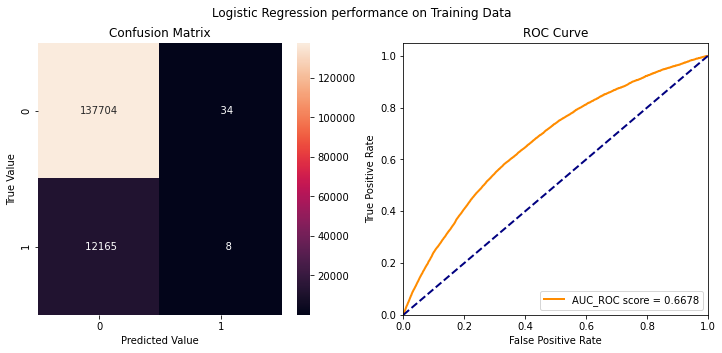

In [61]:
# Performance on Training data
train_pred = lr.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, train_pred)
print('Training ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, lr.predict(X_train), fpr, tpr, roc_auc, 'Logistic Regression performance on Training Data')

Validation ROC_AUC Score :  0.6647798598066369


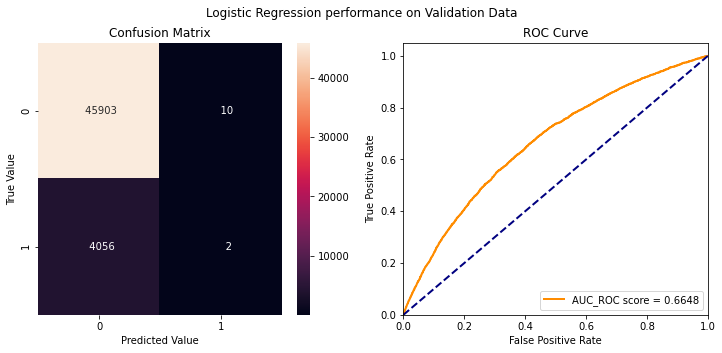

In [62]:
# Performance on Validation data
test_pred = lr.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['Logistic Regression'] = fpr
test_tpr['Logistic Regression'] = tpr
test_roc_auc['Logistic Regression'] = roc_auc

plot_perf(y_test, lr.predict(X_test), fpr, tpr, roc_auc, 'Logistic Regression performance on Validation Data')

In [63]:
submission_test_pred = lr.predict_proba(data_test)[:,1]
# Creating submission file
submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/logistic_submission.csv', index=False)

# SGD

In [64]:
from sklearn.linear_model import SGDClassifier

sgdclf = make_pipeline(StandardScaler(), SGDClassifier())
sgdclf = sgdclf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training ROC_AUC Score :  0.5970055112461773


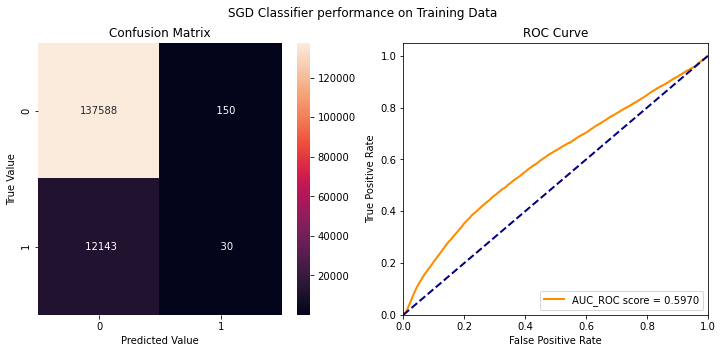

In [65]:
# Performance on Training data
train_pred = sgdclf.decision_function(X_train)
roc_auc = roc_auc_score(y_train, train_pred)

print('Training ROC_AUC Score : ',roc_auc_score(y_train, train_pred))

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, sgdclf.predict(X_train), fpr, tpr, roc_auc, 'SGD Classifier performance on Training Data')

Validation ROC_AUC Score :  0.5992681725375624


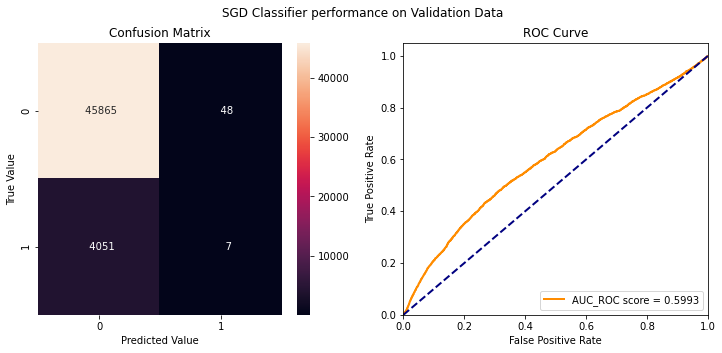

In [66]:
test_pred = sgdclf.decision_function(X_test)
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['SGD Classifier'] = fpr
test_tpr['SGD Classifier'] = tpr
test_roc_auc['SGD Classifier'] = roc_auc

plot_perf(y_test, sgdclf.predict(X_test), fpr, tpr, roc_auc, 'SGD Classifier performance on Validation Data')

# SVM

In [67]:
from sklearn.svm import LinearSVC
svmclf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, C=10,class_weight='balanced', verbose=2))
svmclf = svmclf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LibLinear]

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


TrainingROC_AUC Score :  0.6683394131149551


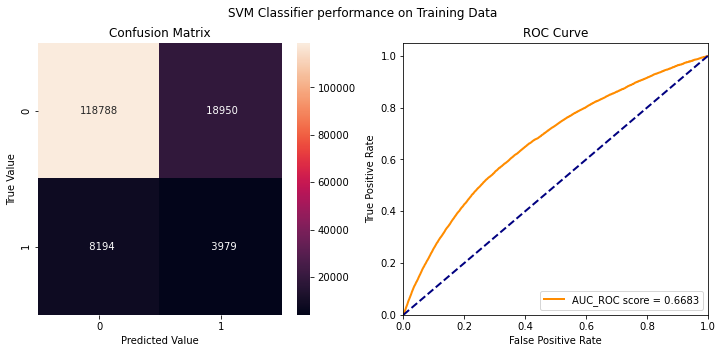

In [68]:
train_pred = svmclf.decision_function(X_train)
roc_auc = roc_auc_score(y_train, train_pred)
print('TrainingROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, svmclf.predict(X_train), fpr, tpr, roc_auc, 'SVM Classifier performance on Training Data')

Validation ROC_AUC Score :  0.6602969614559226


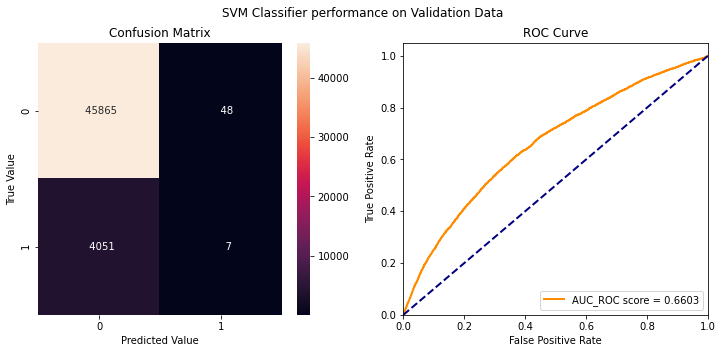

In [69]:
test_pred = svmclf.decision_function(X_test)
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['SVM Classifier'] = fpr
test_tpr['SVM Classifier'] = tpr
test_roc_auc['SVM Classifier'] = roc_auc

plot_perf(y_test, sgdclf.predict(X_test), fpr, tpr, roc_auc, 'SVM Classifier performance on Validation Data')

In [70]:
submission_test_pred = svmclf.decision_function(data_test)
# Creating submission file
submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/svm_submission.csv', index=False)

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=0, max_depth=10)
dtclf = dtclf.fit(X_train, y_train)

TrainingROC_AUC Score :  0.7513701231576951


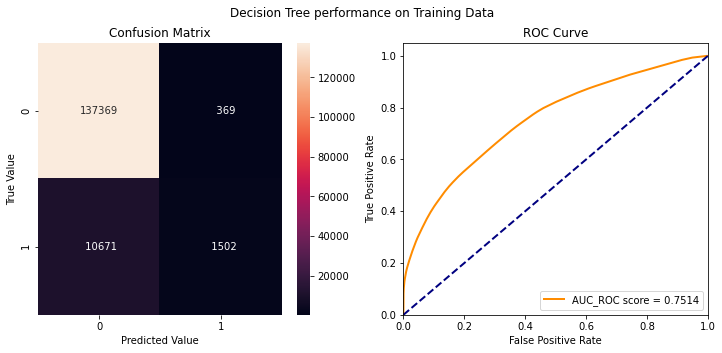

In [72]:
train_pred = dtclf.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, train_pred)
print('TrainingROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, dtclf.predict(X_train), fpr, tpr, roc_auc, 'Decision Tree performance on Training Data')

Validation ROC_AUC Score :  0.7021663650251068


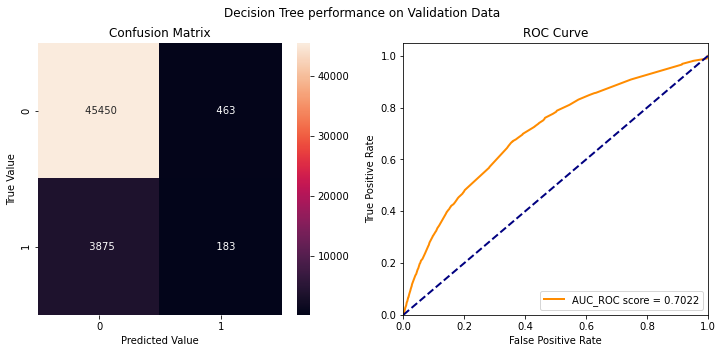

In [73]:
test_pred = dtclf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['Decision Tree'] = fpr
test_tpr['Decision Tree'] = tpr
test_roc_auc['Decision Tree'] = roc_auc

plot_perf(y_test, dtclf.predict(X_test), fpr, tpr, roc_auc, 'Decision Tree performance on Validation Data')

In [74]:
submission_test_pred = dtclf.predict_proba(data_test)[:,1]
# Creating submission file
submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/decisiontree_submission.csv', index=False)

# Random Forest

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training ROC_AUC Score :  0.9986354082938317


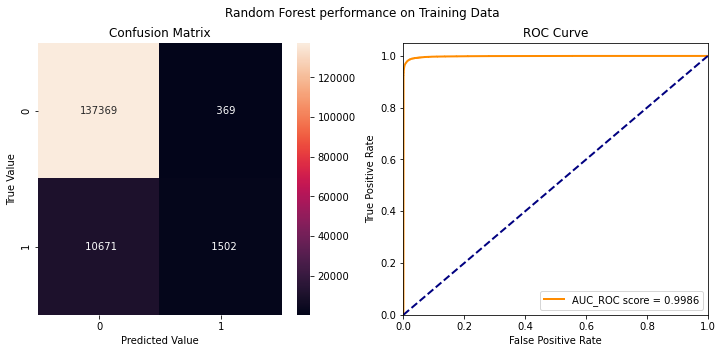

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfclf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 250, max_depth=20, random_state=0))# n_jobs=-1))
rfclf = rfclf.fit(X_train, y_train)

train_pred = rfclf.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, train_pred)
print('Training ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, dtclf.predict(X_train), fpr, tpr, roc_auc, 'Random Forest performance on Training Data')

Validation ROC_AUC Score :  0.741104280872699


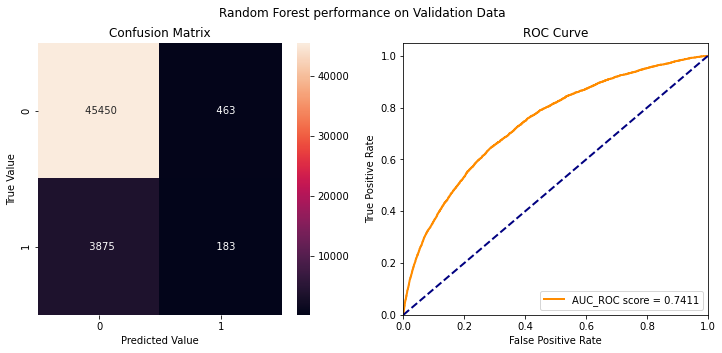

In [76]:
test_pred = rfclf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['Random Forest'] = fpr
test_tpr['Random Forest'] = tpr
test_roc_auc['Random Forest'] = roc_auc

plot_perf(y_test, dtclf.predict(X_test), fpr, tpr, roc_auc, 'Random Forest performance on Validation Data')

In [77]:
submission_test_pred = rfclf.predict_proba(data_test)[:,1]
# Creating submission file
submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/randomforest_submission.csv', index=False)

# XGBOOST

In [78]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.3,max_depth=10,eval_metric="auc", random_state=0)
X_train_nondp = X_train.loc[:,~X_train.columns.duplicated()]
xgb_clf.fit(X_train_nondp, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training ROC_AUC Score :  0.9996602145836755


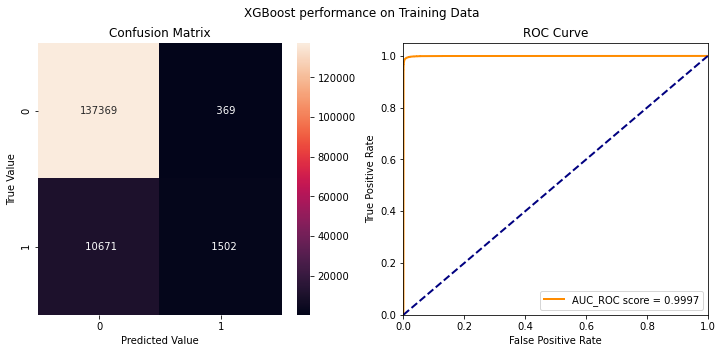

In [79]:
# Performance on Training data
train_pred = xgb_clf.predict_proba(X_train_nondp)[:,1]
roc_auc = roc_auc_score(y_train, train_pred)
print('Training ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, dtclf.predict(X_train), fpr, tpr, roc_auc, 'XGBoost performance on Training Data')

Validation ROC_AUC Score :  0.732036256735463


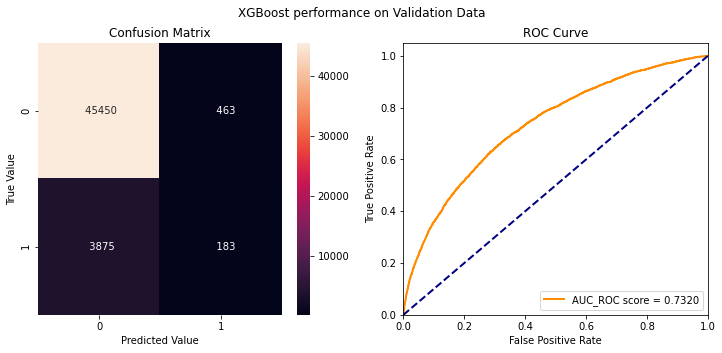

In [80]:
X_test_nondp = X_test.loc[:,~X_test.columns.duplicated()]
# Performance on Validation data
test_pred = xgb_clf.predict_proba(X_test_nondp)[:,1]
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['XGBoost'] = fpr
test_tpr['XGBoost'] = tpr
test_roc_auc['XGBoost'] = roc_auc

plot_perf(y_test, dtclf.predict(X_test), fpr, tpr, roc_auc, 'XGBoost performance on Validation Data')

In [81]:
data_test_nondp = data_test.loc[:,~data_test.columns.duplicated()]
# Creating submission file
submission_test_pred = xgb_clf.predict_proba(data_test_nondp)[:,1]

submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/xgb_submission.csv', index=False)

# LGBM

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training ROC_AUC Score :  0.890113528884084


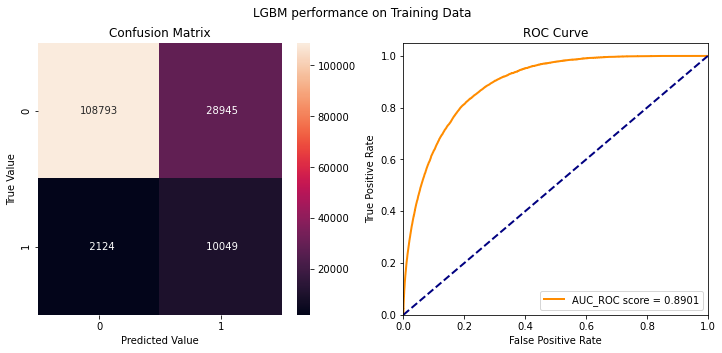

In [82]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(objective='binary', boosting='gbdt', learning_rate=0.05, #n_estimators=2500,
        max_depth= 5,
        num_iterations=600,#600 : 77.21
        num_leaves=50,#40: 76.94,50
        sub_feature= 0.6,#0.6 : 77.17
        sub_row=0.9,
        bagging_freq= 5,#5 : 77.2
        lambda_l1= 0.1,
        lambda_l2= 0.1, is_unbalance=True)
lgb_clf.fit(X_train, y_train, eval_metric='auc')
train_pred = lgb_clf.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, train_pred)
print('Training ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_train, train_pred)

plot_perf(y_train, lgb_clf.predict(X_train), fpr, tpr, roc_auc, 'LGBM performance on Training Data')

Validation ROC_AUC Score :  0.7721277273320746


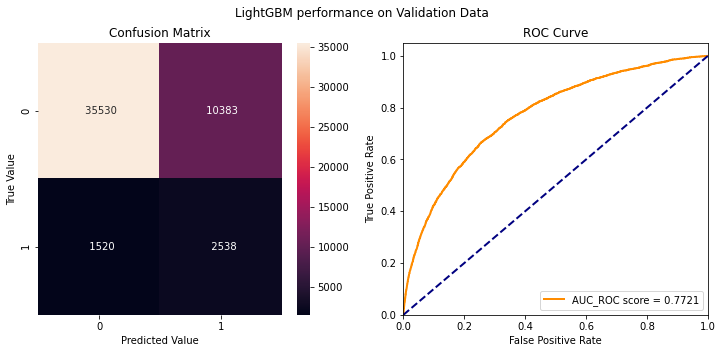

In [83]:
test_pred = lgb_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, test_pred)
print('Validation ROC_AUC Score : ',roc_auc)

fpr, tpr, _ = roc_curve(y_test, test_pred)
test_fpr['LightGBM'] = fpr
test_tpr['LightGBM'] = tpr
test_roc_auc['LightGBM'] = roc_auc

plot_perf(y_test, lgb_clf.predict(X_test), fpr, tpr, roc_auc, 'LightGBM performance on Validation Data')


In [84]:
# Creating submission file
submission_test_pred = lgb_clf.predict_proba(data_test)[:,1]
submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/lgbm_submission.csv', index=False)

**LGBM with cross-validation**

In [85]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lgb_clf, data_train, TARGET, cv=5, return_estimator=True, scoring='roc_auc')
print('Average CV ROC_AUC Score : ',cv_results['test_score'].sum()/5)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/sklearn

Average CV ROC_AUC Score :  0.7734062598018865


**LGBM with SMOTE Oversampled data**

In [86]:
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(sampling_strategy=0.4,random_state = 0) 
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.iloc[:,0])
# print('Shape of new oversampled dataset :', X_train_res.shape)
# print('Ratio of minority class :',y_train_res.sum()/(len(y_train_res)-y_train_res.sum()))

In [87]:
# lgb_clf_res = LGBMClassifier(objective='binary', boosting='gbdt', learning_rate=0.05, #n_estimators=2500,
#         max_depth= 5,
# #         num_iterations=2000,
#         num_leaves=40,
#         sub_feature= 0.9,
#         sub_row=0.9,
#         bagging_freq= 1,
#         lambda_l1= 0.1,
#         lambda_l2= 0.1, is_unbalance=True)
# lgb_clf_res.fit(X_train_res, y_train_res, eval_metric='auc')

In [88]:
# # Performance on Validation data
# test_pred = lgb_clf_res.predict_proba(X_test)[:,1]
# roc_auc = roc_auc_score(y_test, test_pred)
# print('Validation ROC_AUC Score : ',roc_auc)

# fpr, tpr, _ = roc_curve(y_test, test_pred)
# test_fpr['LightGBM with SMOTE'] = fpr
# test_tpr['LightGBM with SMOTE'] = tpr
# test_roc_auc['LightGBM with SMOTE'] = roc_auc

# plot_perf(y_test, lgb_clf_res.predict(X_test), fpr, tpr, roc_auc, 'LightGBM with SMOTE performance on Validation Data')

# Compare all Model performances on validation data

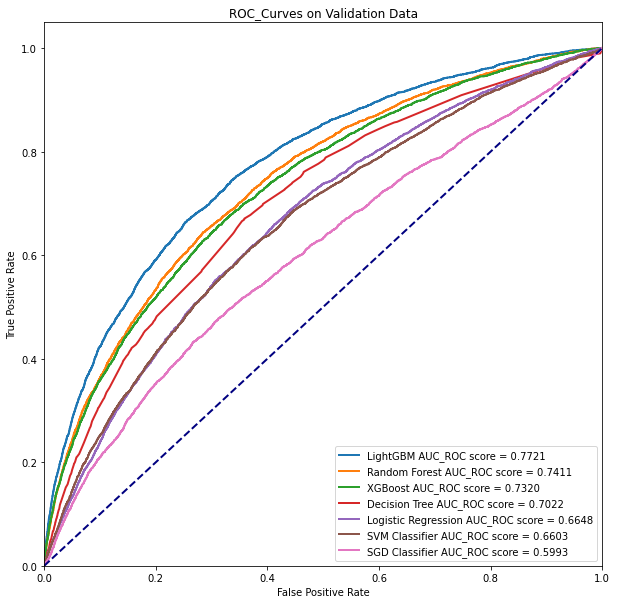

In [89]:
clr_ctr=0
test_roc_auc = dict(sorted(test_roc_auc.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10,10))
for model_name in test_roc_auc :
    plt.plot(test_fpr[model_name], test_tpr[model_name], color='C'+str(clr_ctr), lw=2, label=model_name + ' AUC_ROC score = %0.4f' % test_roc_auc[model_name])
    clr_ctr +=1
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curves on Validation Data')
plt.legend(loc="lower right")
plt.show()

# Submission

In [90]:
# Creating submission file
submission_test_pred = lgb_clf.predict_proba(data_test)[:,1]
submission = pd.DataFrame({
    "SK_ID_CURR": application_test["SK_ID_CURR"],
    "TARGET": submission_test_pred
})
submission.to_csv('/kaggle/working/lgbm_submission.csv', index=False)